If you want to visualize other operator problems, modify the operator_type variable.

In [1]:
operator_type = "Homogeneous" # "Inverse" "Homogeneous" "Nonlinear"

## 1. Import Required Libraries

In [2]:
from visualization.visualization_ODE_utils import *

# Set MindSpore environment
ms.context.set_context(mode=ms.context.PYNATIVE_MODE, device_target="CPU")

# Set matplotlib Chinese font
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Set plotting style - use stable seaborn style
try:
    plt.style.use('seaborn-whitegrid')
except OSError:
    try:
        plt.style.use('seaborn')
    except OSError:
        plt.style.use('default')

# Set seaborn color palette
try:
    sns.set_palette("husl")
except:
    pass

# Set image quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("✅ 库导入完成!")

[ERROR] ME(3263207:140609772373824,MainProcess):2025-08-14-20:50:06.298.362 [mindspore/run_check/_check_version.py:230] Cuda ['10.1', '11.1', '11.6'] version(libcudnn*.so need by mindspore-gpu) is not found. Please confirm that the path of cuda is set to the env LD_LIBRARY_PATH, or check whether the CUDA version in wheel package and the CUDA runtime in current device matches. Please refer to the installation guidelines: https://www.mindspore.cn/install


✅ 库导入完成!


## 2. Data Loading and Preprocessing

In [3]:
config = load_latest_config(operator_type)
if config:
    data = load_data(config)
    print(f"📊 数据加载完成 - 测试样本数: {data['test_branch_input'].shape[0]}")
else:
    print("❌ 请先运行训练脚本生成数据!")

✅ 已加载配置文件: data/Homogeneous_Operator_config_1000_1000_100_10_100.json
📊 数据加载完成 - 测试样本数: 100000


## 3. Model Loading and Setup

In [4]:
# Load model
if config and data:
    model = load_trained_model(config, data)
else:
    print("❌ 请先加载配置和数据!")

✅ 模型加载成功: QuanONet


## 4. Generate Prediction Results

In [5]:
# Generate prediction results

if model and data:
    results = generate_predictions(model, data)
else:
    print("❌ 请先加载模型和数据!")

🔮 开始预测 100000 个测试样本...


✅ 预测完成!
📈 评估指标 - MSE: 0.000223, MAE: 0.010291


## 5. Generate Visualization Results

🎨 构造并预测特定函数 (u₀=x 和 u₀=sin(πx))...
🔧 构造特定函数 u₀=x 和 u₀=sin(πx) 进行预测...
   正在求解微分方程 du/dx = u0(x)...
  Linear Function (u₀=x): MAE = 0.005142


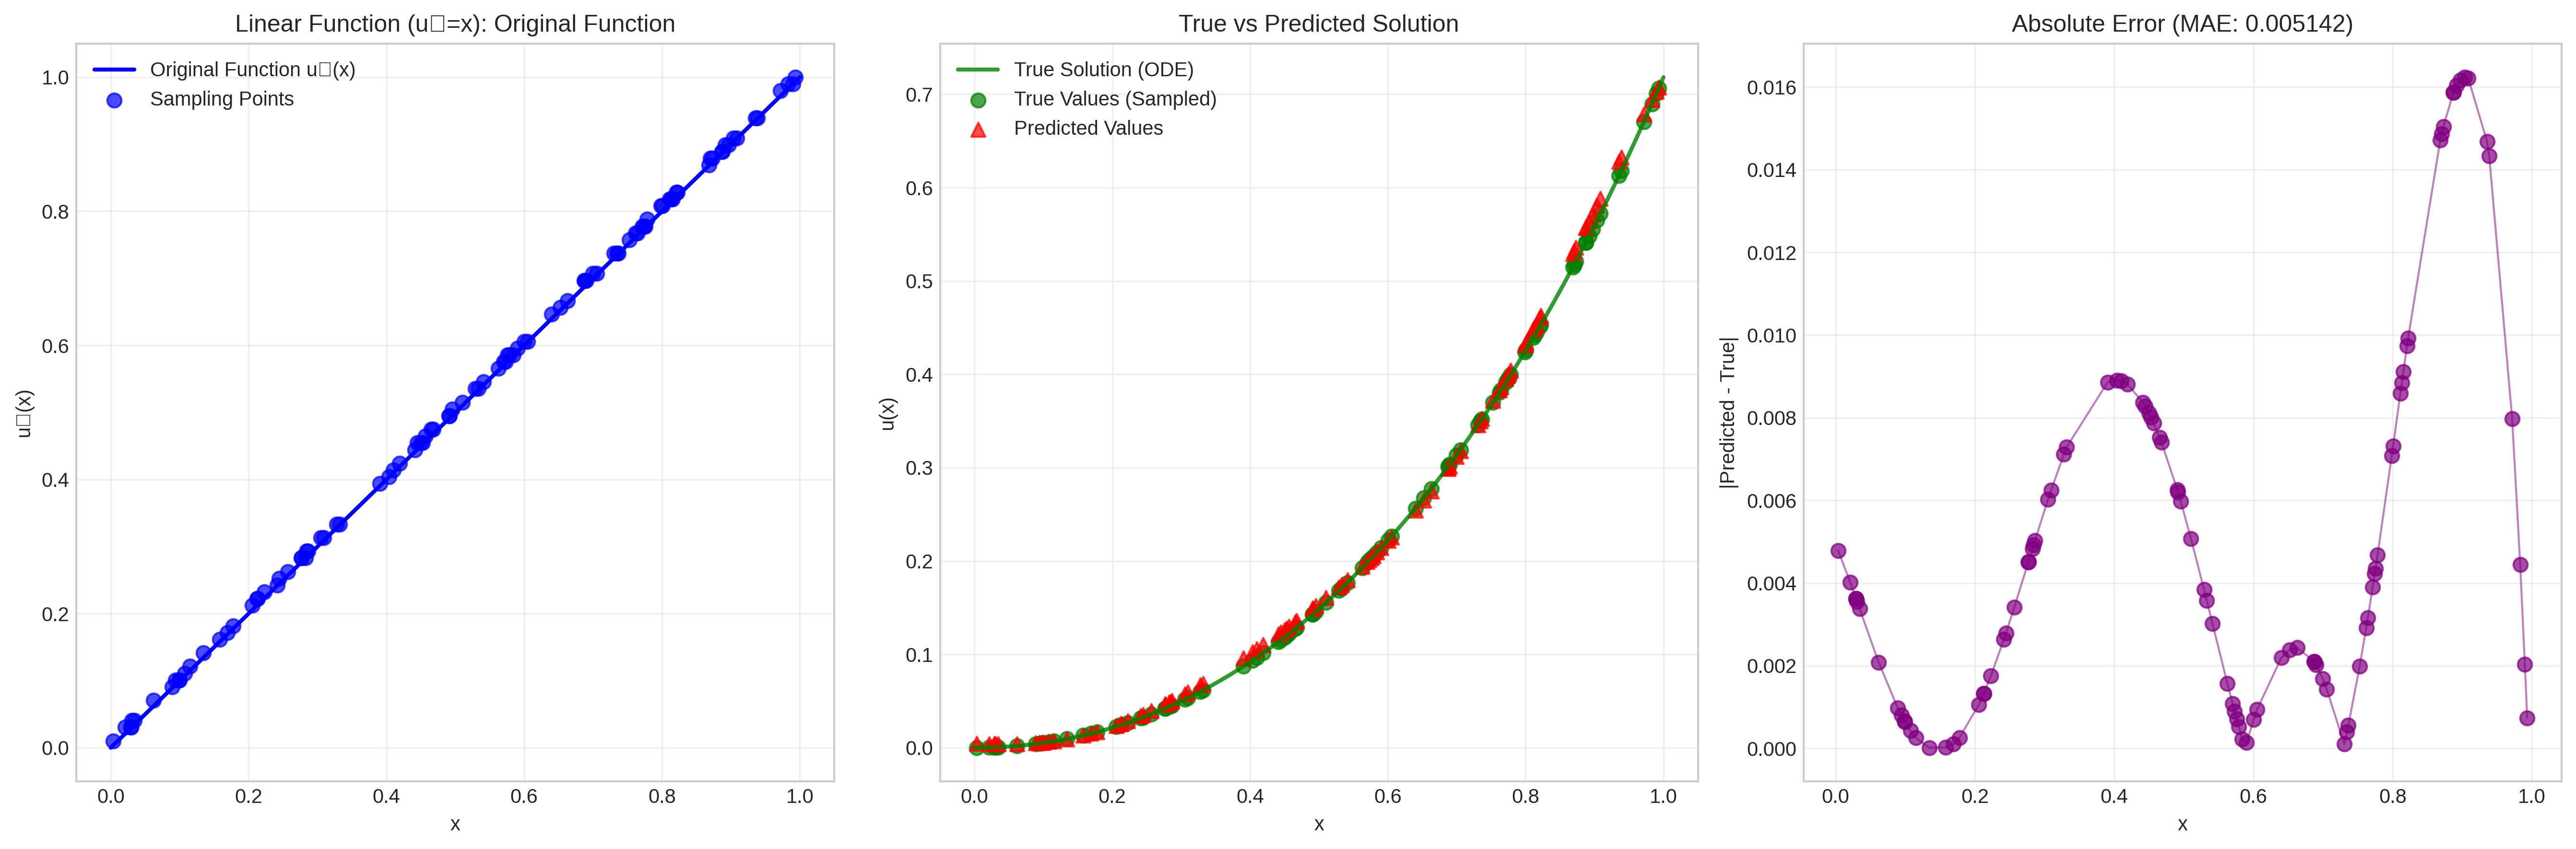

  Sine Function (u₀=sin(πx)): MAE = 0.006517


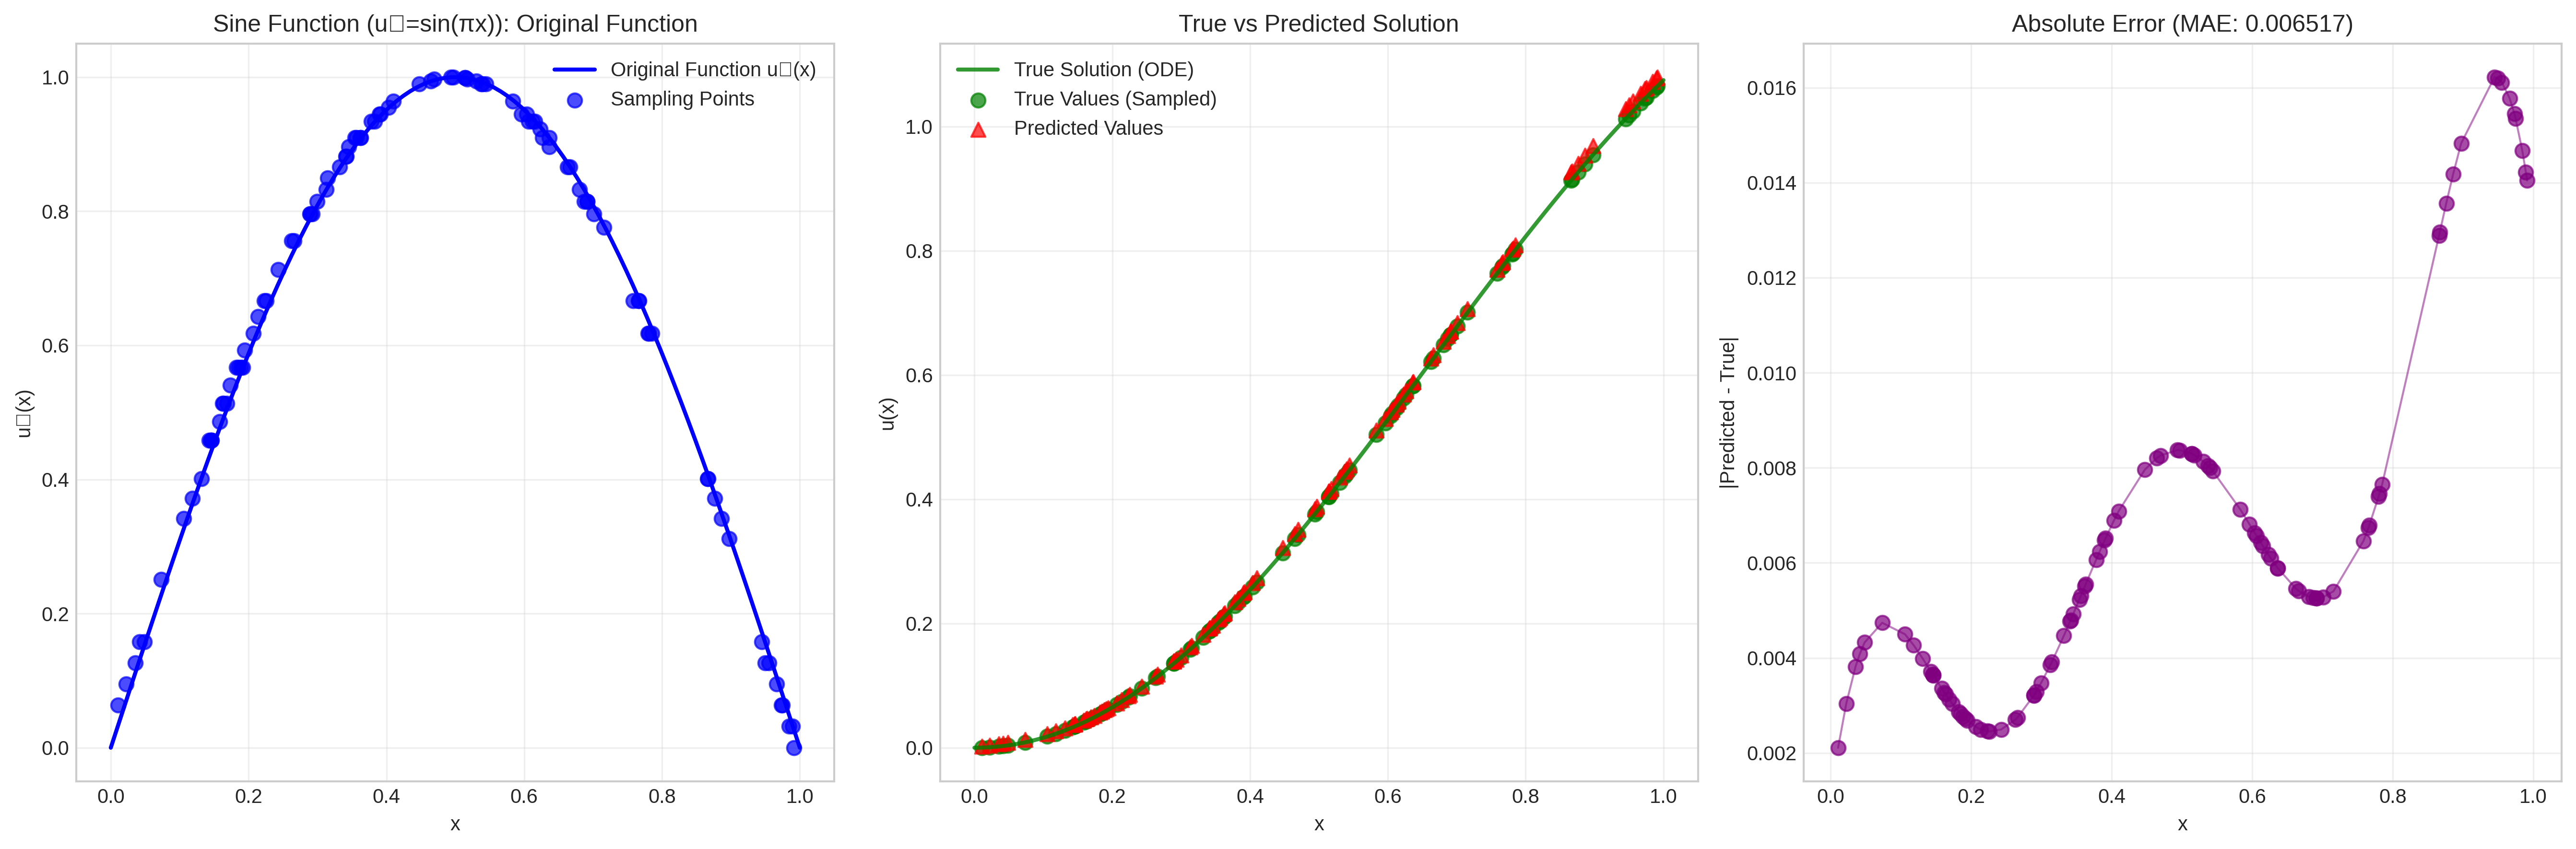

📊 特定函数比较图已保存: visualization_results/QuanONet/Homogeneous_Operator_results
🎨 生成数据集随机样本对比图...
⚠️ 原始函数数据不可用，通过 branch_input 插值重建输入函数
📊 图表已保存: visualization_results/QuanONet/Homogeneous_Operator_results


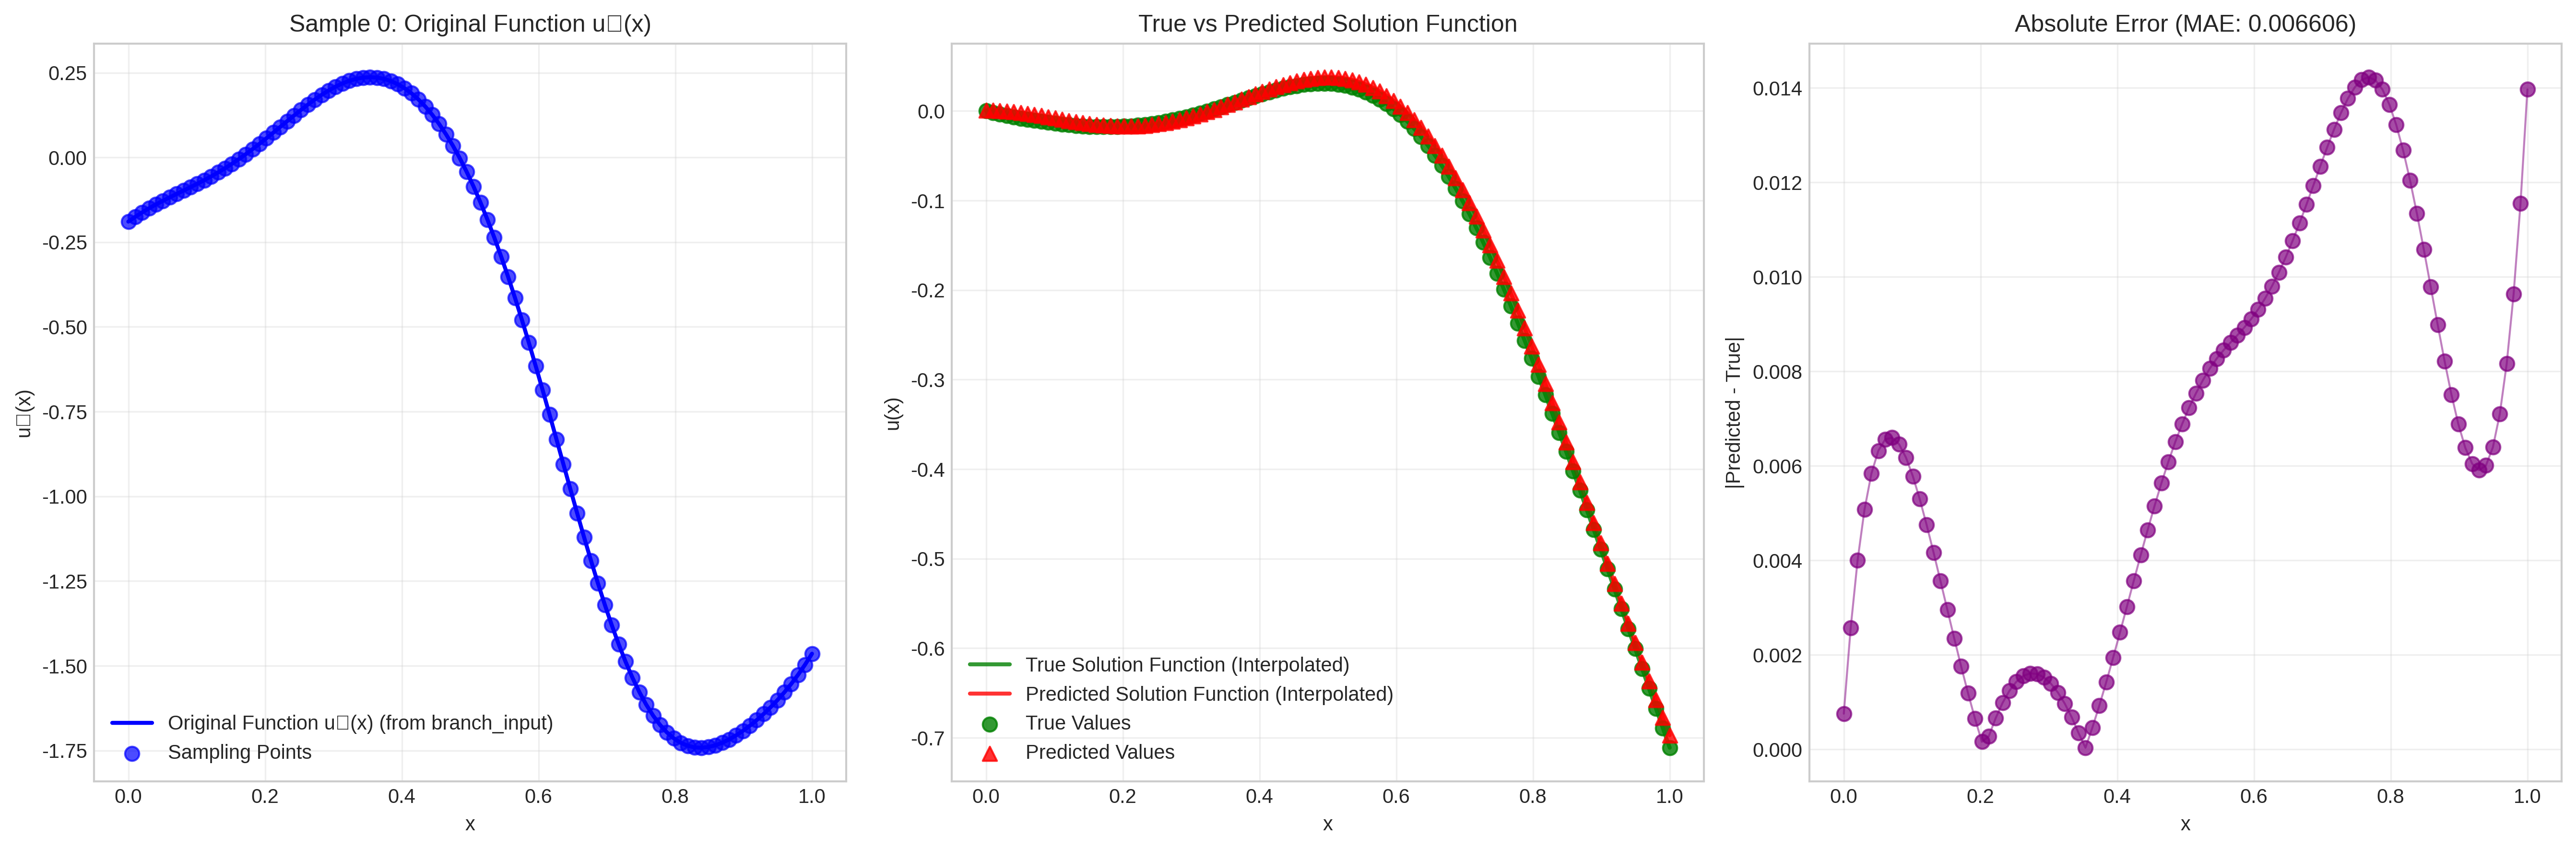

⚠️ 原始函数数据不可用，通过 branch_input 插值重建输入函数
📊 图表已保存: visualization_results/QuanONet/Homogeneous_Operator_results


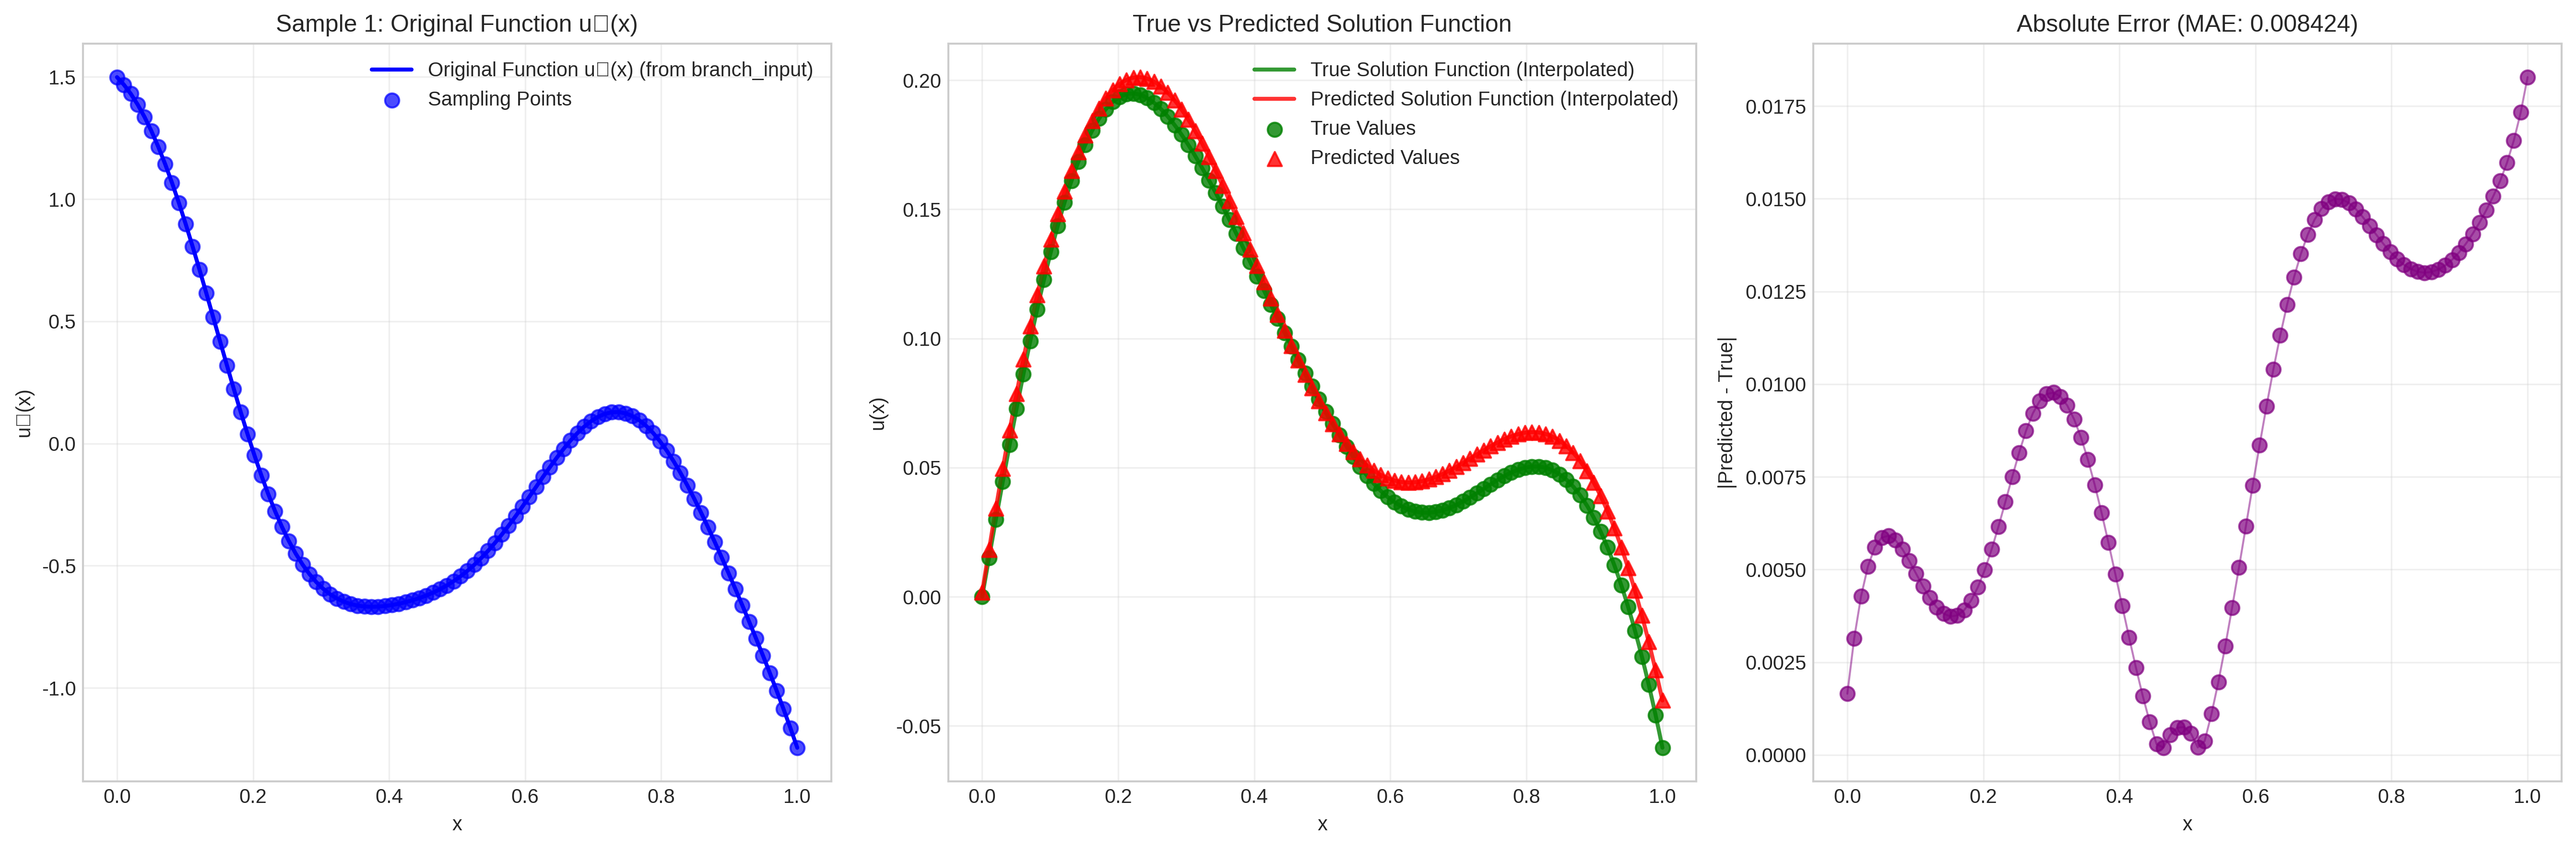

✅ 单样本对比图生成完成!


In [6]:
# Generate visualization comparisons with horizontal layout
ODE_SYSTEMS = {
    'Inverse': {
        'description': 'Inverse operator problem: du/dx = u0(x)',
        'ode_func': lambda u0_fn: lambda x, u: u0_fn(x)
    },
    'Homogeneous': {
        'description': 'Homogeneous operator problem: du/dx = u + u0(x)',
        'ode_func': lambda u0_fn: lambda x, u: u + u0_fn(x)
    },
    'Nonlinear': {
        'description': 'Nonlinear operator problem: du/dx = u - u0²(x)',
        'ode_func': lambda u0_fn: lambda x, u: u - u0_fn(x) ** 2
    }
}

config['ode_system'] = ODE_SYSTEMS[operator_type]['ode_func']
sample_indices = [0, 1]

if results and data and config and model:
    os.makedirs("visualization_results", exist_ok=True)
    
    # 1. Generate special functions comparison (construct u0=x and u0=sin(πx))
    print("🎨 构造并预测特定函数 (u₀=x 和 u₀=sin(πx))...")
    save_path = f"visualization_results/{config['model_type']}/{operator_type}_Operator_results"
    special_results = plot_special_functions_comparison(model, config, save_path)
    
    # 2. Generate random sample comparisons from existing dataset
    print("🎨 生成数据集随机样本对比图...")
    
    for sample_idx in sample_indices:
        save_path = f"visualization_results/{config['model_type']}/{operator_type}_Operator_results"
        plot_single_sample_comparison(sample_idx, data, results, config, save_path)
    
    print(f"✅ 单样本对比图生成完成!")
else:
    print("❌ 请确保已加载模型、数据并生成预测结果!")